In [2]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import healpy as hp
from astropy.io import ascii

mpl.rc('font', size=14)

In [3]:
data = ascii.read('../../python/voidfinder/data/vollim_dr7_cbp_102709.dat',
                  names=['ra', 'dec', 'z', 'Rgal', 'mr_abs'])

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


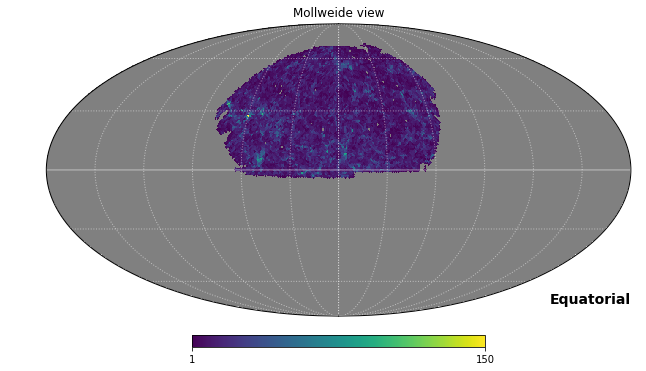

In [19]:
degree = np.pi / 180
nside = 64
npix = hp.nside2npix(nside)

th = (90. - data['dec'])*degree
ph = data['ra']*degree
indices = hp.ang2pix(nside, th, ph)
idx, counts = np.unique(indices, return_counts=True)

angmap = np.zeros(npix, dtype=float) + hp.UNSEEN
angmap[idx] = counts

hp.mollview(angmap, coord='C', flip='astro', rot=180)
hp.graticule(color='white', alpha=0.5)